In [1]:
#connect to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/AIVSColabRequiredFiles/recommendation-system.csv')

#Graph part
G = nx.DiGraph()

# Add nodes
for node in list(df.iloc[1:,0]):
    G.add_node(str(node))

#adjacency list
adj_list = {}

# Add edges
for i in range(0, len(df.index)):
  for j in list(df.iloc[i, 1: ]):
    if str(j) != ' ' and str(df.iloc[i, 0]) != str(j):
      G.add_edge(str(df.iloc[i, 0]),str(j))
      if str(df.iloc[i, 0]) in adj_list.keys():
        adj_list[str(df.iloc[i, 0])] += [str(j)]
      else:
        adj_list[str(df.iloc[i, 0])] = [str(j)]

'''
# Draw the graph
plt.figure(figsize=(100, 90))
pos = nx.spring_layout(G)  # You can choose other layouts as well

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray')

plt.title('Graph Visualization')
plt.show()
'''

#adj_matrix
adj_matrix = np.array([[0 for i in range(144)] for j in range(144)])

#creating connection dict
conn_dict = {}
u = 0

for i in range(0, len(df.index)):
  for j in range(0, len(df.columns)):
    if str(df.iloc[i, j]) not in conn_dict.keys() and str(df.iloc[i, j]) != ' ':
      conn_dict[str(df.iloc[i, j])] = u
      u += 1

print(len(conn_dict))

for k in adj_list.keys():
  if k != ' ':
    row = conn_dict[str(k)]
    for item in adj_list[k]:
      if item != ' ':
        col = conn_dict[str(item)]
        adj_matrix[row, col] = 1


# adding -1 where adj_matrix[i, j] = 1 and adj_matrix[j, i] != 1
for k1 in range(144):
  for k2 in range(144):
    if adj_matrix[k1, k2] == 1 and adj_matrix[k2, k1] == 0:
      adj_matrix[k2, k1] = -1

print(adj_matrix)


143
[[ 0  1  1 ...  0  0  0]
 [ 1  0  1 ...  0  0  0]
 [ 1 -1  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [ ]:
M = adj_matrix

# Value of k
K = 30

# Initialize U and V
U = np.random.rand(len(M), K)
V = np.random.rand(K, len(M[0]))

# Error calculation function
def objective_func(M, generated_matrix, U, V, beta):
    re = np.sum(U**2) + np.sum(V**2)
    E = M - generated_matrix
    E_squared = E**2
    total_error = np.sum(E_squared[M != 0])
    return total_error + beta*re

# Function to update U and V
def update_U_V(alpha, i, j, error, U, V, K, beta):
    for k in range(K):
        U[i, k] += alpha * (2 * error * V[k, j] - beta * U[i, k])
        V[k, j] += alpha * (2 * error * U[i, k] - beta * V[k, j])
    return U, V

alpha = 0.001  # Reduced learning rate
beta = 0.01    # Adjusted regularization term
iterations = 200
total_error_list = []

# Main loop
for l in range(iterations):
    generated_matrix = np.dot(U, V)
    total_error = objective_func(M, generated_matrix, U, V, beta)
    for i in range(len(M)):
        for j in range(len(M[0])):
            if M[i, j] != 0:
                error = M[i, j] - np.dot(U[i,:], V[:,j])
                U, V = update_U_V(alpha, i, j, error, U, V, K, beta)

    total_error_list.append(total_error)
    print(f"Iteration {l + 1}/{iterations}, Total Error: {total_error}")

print(total_error_list)


Text(0, 0.5, 'loss')

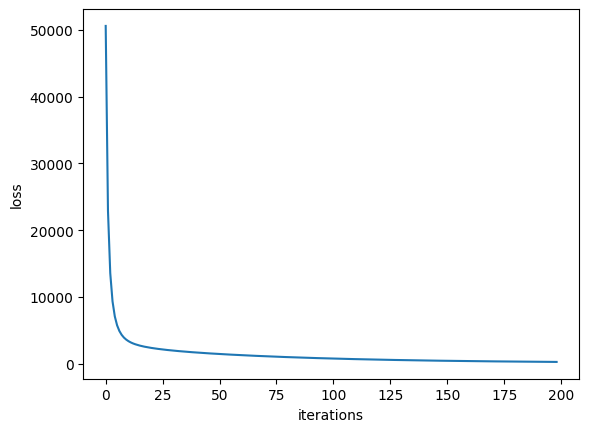

In [4]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0, 199), total_error_list[1:])
plt.xlabel("iterations")
plt.ylabel("loss")

In [ ]:
#loss percentage
total_error_list[-1]/total_error_list[1]

0.005385679246451349